<a href="https://colab.research.google.com/github/tmoura/machinelearning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
print(diabetes['DESCR'])

In [ ]:
import pandas as pd

X = pd.DataFrame(diabetes['data'] )
y = pd.DataFrame(diabetes['target'] )

X.head()

In [ ]:
import seaborn as sns

sns.distplot(diabetes['target']);

In [ ]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

In [22]:
print('Intercept: ', lm.intercept_)
print('R2 for Train: ', lm.score( X_train, y_train ))
print('R2 for Test: ', lm.score(X_test, y_test))

Intercept:  [152.53813352]
R2 for Train:  0.5539285357415583
R2 for Test:  0.33222203269065176


In [12]:
from sklearn import metrics

result = lm.predict(X_test)

acc = metrics.mean_squared_error(result, y_test)

print('MSE:',acc)

df = y_test.copy()

df['PRED'] = result
df = df.rename(columns={0: 'TRUE'})

print('\n\n',df)

MSE: 3424.316688213733


       TRUE        PRED
362  321.0  238.471452
249  215.0  248.931706
271  127.0  164.054042
435   64.0  120.307944
400  175.0  187.424221
..     ...         ...
381  104.0   76.773777
213   49.0   94.940469
134  103.0  145.295505
49   142.0  194.037764
52    59.0  132.785343

[89 rows x 2 columns]


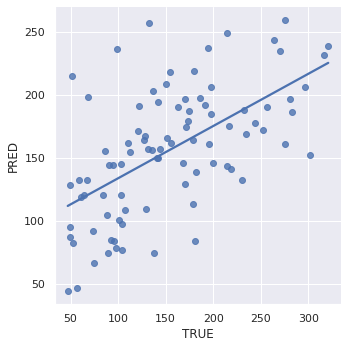

In [21]:
import seaborn as sns; 

ax = sns.lmplot(x='TRUE', y="PRED", data=df[['TRUE','PRED']], ci=None)